# EDA - Bivariate Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import httpimport

from pathlib import Path
from scipy.stats import chi2_contingency, pointbiserialr

In [3]:
# Import personal library
with httpimport.github_repo("junclemente", "jcds", ref="master"):
    import jcds.eda as jq

In [4]:
datasets = Path("../datasets")
full_df = pd.read_csv(datasets / "school_clean.csv")
full_df.head()

,Student_ID,Undergrad_Degree,Undergrad_Grade,MBA_Grade,Work_Experience,Employability_Before,Employability_After,Status,Annual_Salary
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000.0
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,0.0
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,0.0
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,0.0


Since the goal is to determine which students have the highest chance of being placed, the project will focus on data that would be available during admissions. 

The columns are ['Undergrad_Degree', 'Undergrad_Grade', 'Work_Experience', 'Employability_Before', 'Status'].

In [5]:
pre_admission_columns = [
    "Undergrad_Degree",
    "Undergrad_Grade",
    "Work_Experience",
    "Employability_Before",
    "Status",
]
df = full_df[pre_admission_columns]
df.head()

,Undergrad_Degree,Undergrad_Grade,Work_Experience,Employability_Before,Status
0,Business,68.4,No,252.0,Placed
1,Business,62.1,No,423.0,Not Placed
2,Computer Science,70.2,Yes,101.0,Placed
3,Engineering,75.1,No,288.0,Not Placed
4,Finance,60.9,No,248.0,Not Placed


In [6]:
# Create encoded column for status
df.loc[:, "Status_enc"] = df.Status.map({"Placed": 1, "Not Placed": 0})
df.head()

/tmp/ipykernel_24392/2811485972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Status_enc"] = df.Status.map({"Placed": 1, "Not Placed": 0})


,Undergrad_Degree,Undergrad_Grade,Work_Experience,Employability_Before,Status,Status_enc
0,Business,68.4,No,252.0,Placed,1
1,Business,62.1,No,423.0,Not Placed,0
2,Computer Science,70.2,Yes,101.0,Placed,1
3,Engineering,75.1,No,288.0,Not Placed,0
4,Finance,60.9,No,248.0,Not Placed,0


In [7]:
# Set global color palette
global_color = "colorblind"
# Set global color for Seaborn
sns.set_palette(global_color)
# Set global color palette for Matplotlib
colors = sns.color_palette(global_color)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

## Comparison of Undergrad_Grade and Employability_Before to Status

### Box Plot

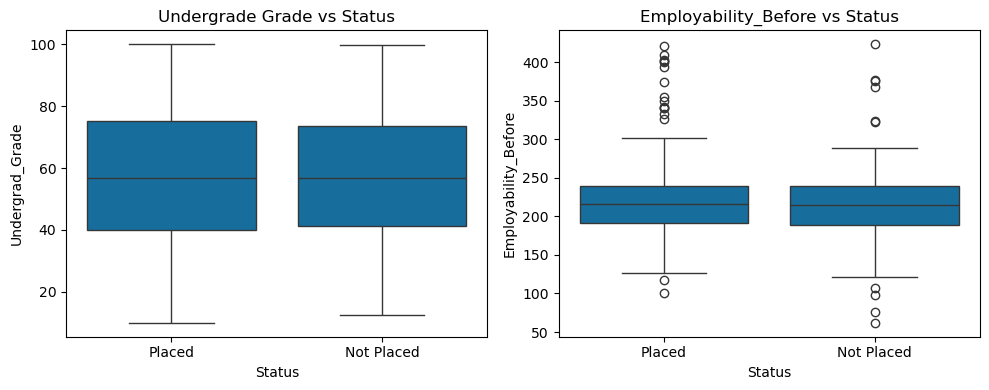

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x="Status", y="Undergrad_Grade", data=df, ax=ax[0])
ax[0].set_title("Undergrade Grade vs Status")

sns.boxplot(x="Status", y="Employability_Before", data=df, ax=ax[1])
ax[1].set_title("Employability_Before vs Status")

plt.tight_layout()
plt.show()

These boxplots do not show anything too significant.

In [23]:
# Correlation of undergrad grade
correlation, p_value = pointbiserialr(df["Undergrad_Grade"], df["Status_enc"])
print("Undergrad Grade vs Status:")
print(f"Correlation: {correlation:.5f}")
print(f"P-value: {p_value:.5f}")


correlation, p_value = pointbiserialr(df["Employability_Before"], df["Status_enc"])
print("\nEmployability Before vs Status:")
print(f"Correlation: {correlation:.5f}")
print(f"P-value: {p_value:.5f}")

Undergrad Grade vs Status:
Correlation: -0.00224
P-value: 0.93816

Employability Before vs Status:
Correlation: 0.04211
P-value: 0.14486


Correlation ranges from -1 to 1. A weak correlation is |0.1| to |0.3|. 
Both variables are showing no correlation or a very weak correlation 0 to |0.1|. 
Depending on the threshold used, a variable can be statistically significant.
The lower the p-value, the more statistically significant it can be. 

- For the undergrad grade, with a high p-value and a very weak correlation, this variable is showing that it has no significance in determining status. 
- For the employability before, it also shows a very weak correlation but the p-value is lower and could have some statistical significance.

### Regression Plots

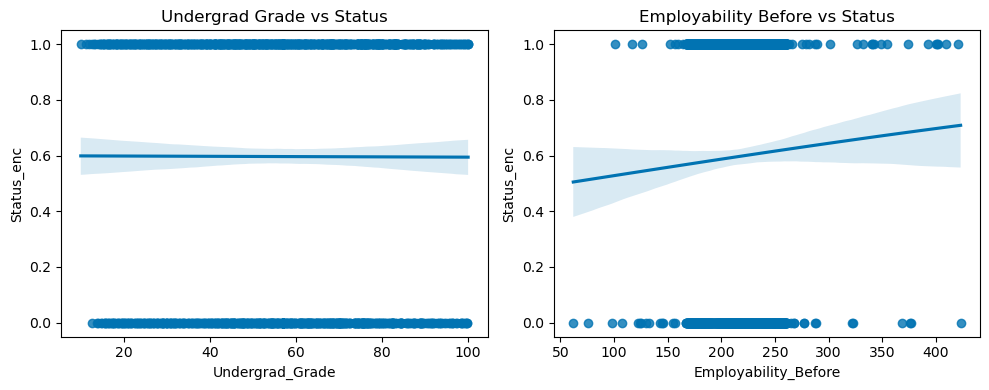

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.regplot(x="Undergrad_Grade", y="Status_enc", data=df, logistic=True, ax=ax[0])
ax[0].set_title("Undergrad Grade vs Status")

sns.regplot(x="Employability_Before", y="Status_enc", data=df, logistic=True, ax=ax[1])
ax[1].set_title("Employability Before vs Status")


plt.tight_layout()
plt.show()

Looking at the regression plot for Undergrad Grade and Status, being a horizontal line, shows that there is no correlation between the two variables. 

For employability before, the upward slope of the regresion line shows that is has a positive correlation with status. 

## Work Experience vs Status

In [18]:
undergrad_contingency = pd.crosstab(df["Undergrad_Degree"], df["Status"])
print(undergrad_contingency)

chi2, p, dof, expected = chi2_contingency(undergrad_contingency)
print(f"Chi-Square value: {chi2}")
print(f"P-value: {p}")

Status            Not Placed  Placed
Undergrad_Degree                    
Art                      224       6
Business                  17     240
Computer Science           9     231
Engineering              230       9
Finance                    4     230
Chi-Square value: 1021.4286957111007
P-value: 8.102228587883412e-220


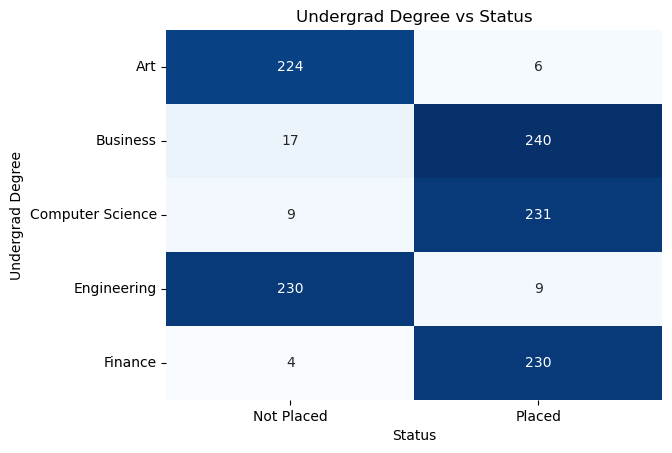

In [19]:
sns.heatmap(undergrad_contingency, annot=True, fmt="g", cmap="Blues", cbar=False)
plt.title("Undergrad Degree vs Status")
plt.xlabel("Status")
plt.ylabel("Undergrad Degree")
plt.show()

In [20]:
workexperience_contingency = pd.crosstab(df["Work_Experience"], df["Status"])
print(workexperience_contingency)

chi2, p, dof, expected = chi2_contingency(workexperience_contingency)
print(f"Chi-Square value: {chi2}")
print(f"P-value: {p}")

Status           Not Placed  Placed
Work_Experience                    
No                      478     588
Yes                       6     128
Chi-Square value: 78.91571614874363
P-value: 6.481706163814314e-19


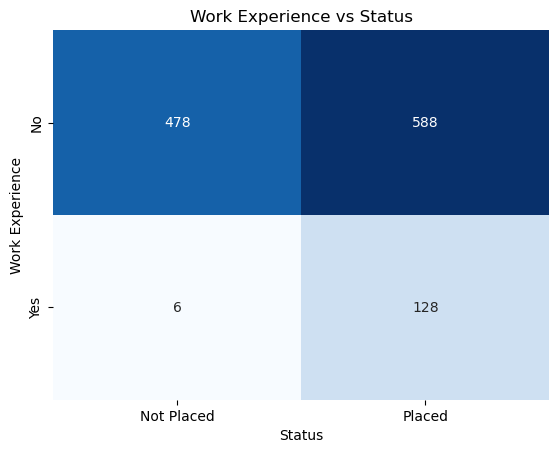

In [21]:
sns.heatmap(workexperience_contingency, annot=True, fmt="g", cmap="Blues", cbar=False)
plt.title("Work Experience vs Status")
plt.xlabel("Status")
plt.ylabel("Work Experience")
plt.show()

## Work Experience vs Status

In [ ]:
crosstab = pd.crosstab(df["Status"], df["Work Experience"])
display(crosstab)

In [ ]:
plt.figure(figsize=(8, 5))

# Plot the bars manually for 'No' and 'Yes' work experience
bars1 = plt.bar(
    crosstab.index, crosstab["No"], label="No Work Experience", color="#1f77b4"
)
bars2 = plt.bar(
    crosstab.index,
    crosstab["Yes"],
    bottom=crosstab["No"],
    label="Yes Work Experience",
    color="#ff7f0e",
)

# Add number counts on top of each bar for 'No Work Experience'
for bar in bars1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height - 30,
        "%d" % int(height),
        ha="center",
        color="white",
        fontweight="bold",
    )

# Add number counts on top of each bar for 'Yes Work Experience'
for bar in bars2:
    height = bar.get_height() + bar.get_y()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 10,
        "%d" % int(height),
        ha="center",
        color="black",
        fontweight="bold",
    )

# Add labels and title
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Stacked Bar Chart: Work Experience vs Status After Graduation")
plt.legend()

# Show the plot
plt.show()

Chart shows that students were more employable after graduation. 